<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-и-подготовка-данных" data-toc-modified-id="Обзор-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Проверка-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-расчета-эффективности-обогащения-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка расчета эффективности обогащения</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Оценка-изменения-концентрации-металлов-на-различных-этапах-очистки" data-toc-modified-id="Оценка-изменения-концентрации-металлов-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Оценка изменения концентрации металлов на различных этапах очистки</a></span></li><li><span><a href="#Сравение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравение распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-и-тестирование-модели" data-toc-modified-id="Обучение-и-тестирование-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Подготовка-выборок" data-toc-modified-id="Подготовка-выборок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка выборок</a></span></li><li><span><a href="#Обучение-и-выбор-модели" data-toc-modified-id="Обучение-и-выбор-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение и выбор модели</a></span></li><li><span><a href="#Проверка-модели" data-toc-modified-id="Проверка-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка модели</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

**Иcходные данные**

Компания разрабатывает решения для эффективной работы промышленных предприятий. 

Нужно оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

В нашем распоряжении сырые данные, выгруженные из хранилища. 

**Цель исследования**

Построить модель, предсказывающую коэффициент восстановления золота из золотосодержащей руды по данным с параметрами добычи и очистки.

**Ход исследования**
1. Обзор и подготовка данных.
2. Исследовательский анализ данных.
3. Обучение и тестирование модели.

## Обзор и подготовка данных

### Импорт библиотек

Импортируем библиотеки.

In [423]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from scipy import stats as st

### Обзор данных

Импортируем данные.

In [386]:
part_of_name = ['full', 'test', 'train']
df_list = []

for i in part_of_name:
    pth1 = 'gold_recovery_' + i + '_new.csv'
    pth2 = '/datasets/gold_recovery_' + i + '_new.csv'
    if os.path.exists(pth1):
        globals()['df_' + i] = pd.read_csv(pth1, index_col=0)
    elif os.pathappendists(pth2):
        globals()['df_' + i] = pd.read_csv(pth2, index_col=0)
    else:
        print('Что-то пошло не так :(')
    df_list.append(globals()['df_' + i])

Посмотрим данные.

In [387]:
#снимем ограничение с параметров вывода.
pd.set_option('display.max_rows', None, 'display.max_columns', None)

for df in df_list:
    print(df.info())
    display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01-15 04:00:00                      4.939416   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 00:00:00                    42.192020              70.541216   
2016-01-15 01:00:00                    42.701629              69.266198   
2016-01-15 02:00:00                    42.657501              68.116445   
2016-01-15 03:00:00                    42.689819              68.347543   
2016-01-15 04:00:00                    42.774141              66.927016   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 00:00:00             10.411962              0.895447   
2016-01-15 01:00:00             10.462676              0.927452   
2016-01-15 02:00:00             10.507046              0.953716   
2016-01-15 03:00:00             10.422762              0.883763   
2016-01-15 04:00:00             10.360302              0.792826   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 00:00:00              16.904297              2.143149   
2016-01-15 01:00:00              16.634514              2.224930   
2016-01-15 02:00:00              16.208849              2.257889   
2016-01-15 03:00:00              16.532835              2.146849   
2016-01-15 04:00:00              16.525686              2.055292   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-01-15 00:00:00                     127.092003   
2016-01-15 01:00:00                     125.629232   
2016-01-15 02:00:00                     123.819808   
2016-01-15 03:00:00                     122.270188   
2016-01-15 04:00:00                     117.988169   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-15 00:00:00                         10.128295   
2016-01-15 01:00:00                         10.296251   
2016-01-15 02:00:00                         11.316280   
2016-01-15 03:00:00                         11.322140   
2016-01-15 04:00:00                         11.913613   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-15 00:00:00                             7.25   
2016-01-15 01:00:00                             7.25   
2016-01-15 02:00:00                             7.25   
2016-01-15 03:00:00                             7.25   
2016-01-15 04:00:00                             7.25   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-15 00:00:00                        0.988759   
2016-01-15 01:00:00                        1.002663   
2016-01-15 02:00:00                        0.991265   
2016-01-15 03:00:00                        0.996739   
2016-01-15 04:00:00                        1.009869   

                     primary_cleaner.output.concen

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

primary_cleaner.input.sulfate  \
date                                                 
2016-09-01 00:59:59                     210.800909   
2016-09-01 01:59:59                     215.392455   
2016-09-01 02:59:59                     215.259946   
2016-09-01 03:59:59                     215.336236   
2016-09-01 04:59:59                     199.099327   

                     primary_cleaner.input.depressant  \
date                                                    
2016-09-01 00:59:59                         14.993118   
2016-09-01 01:59:59                         14.987471   
2016-09-01 02:59:59                         12.884934   
2016-09-01 03:59:59                         12.006805   
2016-09-01 04:59:59                         10.682530   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-09-01 00:59:59                         8.080000   
2016-09-01 01:59:59                         8.080000   
2016-09-01 02:59:59                         7.786667   
2016-09-01 03:59:59                         7.640000   
2016-09-01 04:59:59                         7.530000   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-09-01 00:59:59                        1.005021   
2016-09-01 01:59:59                        0.990469   
2016-09-01 02:59:59                        0.996043   
2016-09-01 03:59:59                        0.863514   
2016-09-01 04:59:59                        0.805575   

                     primary_cleaner.state.floatbank8_a_air  \
date                                                          
2016-09-01 00:59:59                             1398.981301   
2016-09-01 01:59:59                             1398.777912   
2016-09-01 02:59:59                             1398.493666   
2016-09-01 03:59:59                             1399.618111   
2016-09-01 04:59:59                             1401.268123   

                     primary_cleaner.state.floatbank8_a_level  \
date                                                            
2016-09-01 00:59:59                               -500.225577   
2016-09-01 01:59:59                               -500.057435   
2016-09-01 02:59:59                               -500.868360   
2016-09-01 03:59:59                               -498.863574   
2016-09-01 04:59:59                               -500.808305   

                     primary_cleaner.state.floatbank8_b_air  \
date                                                          
2016-09-01 00:59:59                             1399.144926   
2016-09-01 01:59:59                             1398.055362   
2016-09-01 02:59:59                             1398.860436   
2016-09-01 03:59:59                             1397.440120   
2016-09-01 04:59:59                             1398.128818   

                     primary_cleaner.state.floatbank8_b_level  \
date                                                            
2016-09-01 00:59:59                               -499.919735   
2016-09-01 01:59:59                               -499.778182   
2016-09-01 02:59:59                               -499.764529   
2016-09-01 03:59:59                               -499.211024   
2016-09-01 04:59:59                               -499.504543   

                     primary_cleaner.state.floatbank8_c_air  \
date                                                          
2016-09-01 00:59:59                             1400.102998   
2016-09-01 01:59:59                             1396.151033   
2016-09-01 02:59:59                             1398.075709   
2016-09-01 03:59:59                             1400.129303   
2016-09-01 04:59:59                             1402.172226   

                     primary_cleaner.state.floatbank8_c_level  \
date                                                            
2016-09-01 00:59:59                               -500.704369   
2016-09-01 01:59:59           

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01-15 04:00:00                      4.939416   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 00:00:00                    42.192020              70.541216   
2016-01-15 01:00:00                    42.701629              69.266198   
2016-01-15 02:00:00                    42.657501              68.116445   
2016-01-15 03:00:00                    42.689819              68.347543   
2016-01-15 04:00:00                    42.774141              66.927016   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 00:00:00             10.411962              0.895447   
2016-01-15 01:00:00             10.462676              0.927452   
2016-01-15 02:00:00             10.507046              0.953716   
2016-01-15 03:00:00             10.422762              0.883763   
2016-01-15 04:00:00             10.360302              0.792826   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 00:00:00              16.904297              2.143149   
2016-01-15 01:00:00              16.634514              2.224930   
2016-01-15 02:00:00              16.208849              2.257889   
2016-01-15 03:00:00              16.532835              2.146849   
2016-01-15 04:00:00              16.525686              2.055292   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-01-15 00:00:00                     127.092003   
2016-01-15 01:00:00                     125.629232   
2016-01-15 02:00:00                     123.819808   
2016-01-15 03:00:00                     122.270188   
2016-01-15 04:00:00                     117.988169   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-15 00:00:00                         10.128295   
2016-01-15 01:00:00                         10.296251   
2016-01-15 02:00:00                         11.316280   
2016-01-15 03:00:00                         11.322140   
2016-01-15 04:00:00                         11.913613   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-15 00:00:00                             7.25   
2016-01-15 01:00:00                             7.25   
2016-01-15 02:00:00                             7.25   
2016-01-15 03:00:00                             7.25   
2016-01-15 04:00:00                             7.25   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-15 00:00:00                        0.988759   
2016-01-15 01:00:00                        1.002663   
2016-01-15 02:00:00                        0.991265   
2016-01-15 03:00:00                        0.996739   
2016-01-15 04:00:00                        1.009869   

                     primary_cleaner.output.concen

Итак, мы имеем 3 таблицы - исходные данные, обучающая и тестовая выборка. Исходная и обучающая выборки содержат по 86 признаков. Тестовая - 52. Общее число объекстов 19439.

Согласно документации к данным: 

***Описание данных***

**Технологический процесс**
* `Rougher feed` — исходное сырье
* `Rougher additions` (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    * `Xanthate` **— ксантогенат (промотер, или активатор флотации);
    * `Sulphate` — сульфат (на данном производстве сульфид натрия);
    * `Depressant` — депрессант (силикат натрия).
* `Rougher process` (англ. «грубый процесс») — флотация
* `Rougher tails` — отвальные хвосты
* `Float banks` — флотационная установка
* `Cleaner process` — очистка
* `Rougher Au` — черновой концентрат золота
* `Final Au` — финальный концентрат золота

**Параметры этапов**
* `air amount` — объём воздуха
* `fluid levels` — уровень жидкости
* `feed size` — размер гранул сырья
* `feed rate` — скорость подачи


Названия признаков имеют следующий принцип расшифровки:

`[этап].[тип_параметра].[название_параметра]`

Пример: `rougher.input.feed_ag`

**Возможные значения для блока `[этап]`**:
* `rougher` — флотация
* `primary_cleaner` — первичная очистка
* `secondary_cleaner` — вторичная очистка
* `final` — финальные характеристики

**Возможные значения для блока `[тип_параметра]`**:
* `input` — параметры сырья
* `output` — параметры продукта
* `state` — параметры, характеризующие текущее состояние этапа
* `calculation` — расчётные характеристики

**Целевые признаки**:
* `rougher.output.recovery` - эффективность обогащения чернового концентрата
* `final.output.recovery` - эффективность обогащения финального концентрата

По результату первичного обзора данных можем сделать следующие выводы:
1. Наименования всех признаков соответствуют зминому стилю.
2. В значениях некоторых признаков присутствуют пропуски.
3. Отсутствуют категориальные признаки.
4. Количество признаков в обучающей и тестовой выборках не совпадают.
5. В тестовой выборке отсутствуют целевые признаки.

Нам необходимо:
1. Проверить, что эффективность обогащения рассчитана правильно на примере `rougher.output.recovery`.
2. Проанализировать и заполнить пропуски.
3. Проверить данные на дубликаты.
4. Установить причину отсутствия в тестовой выборки части признаков.
5. Убрать из обучающей выборки целевые признаки.
6. Создать таблицы с целевыми признаками для обучающей и тестовой выборок.

### Проверка расчета эффективности обогащения

Рассчитаем эффективность обогащения чернового концентрата самостоятельно и проведем сравнение.

In [388]:
# запишем данные в переменные
c = df_train['rougher.output.concentrate_au']
f = df_train['rougher.input.feed_au']
t = df_train['rougher.output.tail_au']

df_train['rougher.output.recovery_estimated'] = (c * (f - t)) / (f * (c - t)) * 100

# рассчитаем среднюю абсолютную ошибку между рассчетным значением и признаком.
mae_recovery = mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.recovery_estimated'])

print(f'Средняя абсолютная ошибка между признаком и рассчетным значением эффективности обогащения чернового концентрата:{mae_recovery:.15f}')

Средняя абсолютная ошибка между признаком и рассчетным значением эффективности обогащения чернового концентрата:0.000000000000010


Разница стремиться к 0. Данные в таблице указаны верно.

Добавленный столбец можем удалить.

In [389]:
df_train = df_train.drop(['rougher.output.recovery_estimated'], axis=1)

### Предобработка данных

Для начала осмотрим признаки присутствующие в общеих и обучающих данных, но исключенные из тестовой выборки.

In [390]:
excluded_features = [x for x in df_train.columns if x not in df_test.columns]
excluded_features

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Среди признаков имеем:
* конечные данные по выходному концентрату и хвостам по всем элементам
* данные по концентрату и хвостам после первичной очистки
* данные по концентрату и хвостам после флуатации
* данные по концентрату и хвостам после вторичной очистки
* расчетные характеристики процесса флоатации - расход сульфата и соотношение золота и свинца.
* 2 целевых признака

Все эти признаки необходимо исключить перед обучением модели, так как их наличие в тренировочной выборке приведет к утечке целевого признака. Прогноз нам необходимо будет получать, когда эти данные ещё не расчитаны.

Удалим из тренировокной выборки все лишние столбцы.

In [391]:
excluded_features.remove('final.output.recovery')

In [392]:
excluded_features.remove('rougher.output.recovery')

In [393]:
df_train = df_train.drop(excluded_features, axis=1)

# проверим число столбцов в обучающей выборке. должно быть 52 + 2 целевых
print('Число столбцов в обучающей выборке:', df_train.shape[1])

Число столбцов в обучающей выборке: 54


Пережде чем создать чистые выборки, проанализируем и заполним пропуски. Убедимся в отсутствии дубликатов.

In [394]:
df_train.duplicated().sum()

0

In [395]:
df_test.duplicated().sum()

0

Полные дублекаты отсутствуют. Проверим дубликаты в индексах.

In [396]:
df_train.index.duplicated().sum()

0

In [397]:
df_test.index.duplicated().sum()

0

Отсутствуют. Перейдем к обработке пропусков.

Оценим общее количество пропусков по полной выборке, предворительно удалив лишние столбцы.

In [398]:
# оценим общее количество пропусков по полной выборке
df_full_clean = df_full.drop(excluded_features, axis=1)
df_full_clean.isna().sum()

final.output.recovery                           0
primary_cleaner.input.sulfate                  24
primary_cleaner.input.depressant               37
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                104
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                        11
rougher.input.feed_size                       145
rougher.input.feed_sol                         99
rougher.input.feed_au                           0
rougher.input.floatbank10_sulfate              34


В целевых признаках пропуски отсутствуют.

Рассмотрим признаки с наибольшим числом пропусков.

In [399]:
df_full_clean[df_full_clean['rougher.input.floatbank11_xanthate'].isna()].head()

final.output.recovery  primary_cleaner.input.sulfate  \
date                                                                        
2016-01-19 02:00:00              58.017871                      15.273131   
2016-01-21 10:00:00              74.257359                            NaN   
2016-03-02 11:00:00               0.463711                            NaN   
2016-05-15 13:59:59              79.975380                     159.551841   
2016-05-15 14:59:59              45.586191                      58.717323   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-19 02:00:00                          1.940663   
2016-01-21 10:00:00                               NaN   
2016-03-02 11:00:00                          0.012373   
2016-05-15 13:59:59                         11.972081   
2016-05-15 14:59:59                         12.027662   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-19 02:00:00                             7.25   
2016-01-21 10:00:00                             7.25   
2016-03-02 11:00:00                             7.62   
2016-05-15 13:59:59                             7.74   
2016-05-15 14:59:59                             6.61   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-19 02:00:00                        0.180119   
2016-01-21 10:00:00                             NaN   
2016-03-02 11:00:00                        0.001285   
2016-05-15 13:59:59                        0.904101   
2016-05-15 14:59:59                        0.922359   

                     primary_cleaner.state.floatbank8_a_air  \
date                                                          
2016-01-19 02:00:00                             1546.951271   
2016-01-21 10:00:00                                     NaN   
2016-03-02 11:00:00                             1602.198286   
2016-05-15 13:59:59                             1203.830417   
2016-05-15 14:59:59                             1392.770893   

                     primary_cleaner.state.floatbank8_a_level  \
date                                                            
2016-01-19 02:00:00                               -501.138590   
2016-01-21 10:00:00                                       NaN   
2016-03-02 11:00:00                               -450.681741   
2016-05-15 13:59:59                               -499.751674   
2016-05-15 14:59:59                               -500.326034   

                     primary_cleaner.state.floatbank8_b_air  \
date                                                          
2016-01-19 02:00:00                             1550.530280   
2016-01-21 10:00:00                                     NaN   
2016-03-02 11:00:00                             1600.252087   
2016-05-15 13:59:59                             1204.874868   
2016-05-15 14:59:59                             1299.437987   

                     primary_cleaner.state.floatbank8_b_level  \
date                                                            
2016-01-19 02:00:00                               -500.130616   
2016-01-21 10:00:00                                       NaN   
2016-03-02 11:00:00                               -449.323651   
2016-05-15 13:59:59                               -499.591962   
2016-05-15 14:59:59                               -499.958419   

                     primary_cleaner.state.floatbank8_c_air  \
date                                                          
2016-01-19 02:00:00                             1551.535239   
2016-01-21 10:00:00                                     NaN   
2016-03-02 11:00:00                             1599.761123   
2016-05-15 13:59:59                             1201.389978   
2016-05-15 14:59:59                             1203.788552   

                     primary_cleaner.state.floatbank8_c_level  \

Нам известно, что соседние по времени (т.е. индексу) параметры обычно похожи. Можем попробовать интерполировать по ближайшим по времени наблюдениям. 

Удобнее сделать это на общей выборке, а потом подтянуть значения по индексам в тестовые и тренировочные выборки.

In [400]:
df_full_clean = df_full_clean.interpolate()

# убедимся, что пропуски заполнены
df_full_clean.isna().sum()

final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Проверим корректность значений.

In [401]:
df_full_clean['2016-01-21 08:00:00':'2016-01-21 12:00:00']

final.output.recovery  primary_cleaner.input.sulfate  \
date                                                                        
2016-01-21 08:00:00              66.847030                     188.311758   
2016-01-21 09:00:00              70.768558                     182.179285   
2016-01-21 10:00:00              74.257359                     204.330941   
2016-01-21 11:00:00              72.591034                     226.482598   
2016-01-21 12:00:00              70.019697                     230.232526   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-21 08:00:00                         15.040277   
2016-01-21 09:00:00                         14.984341   
2016-01-21 10:00:00                         15.486528   
2016-01-21 11:00:00                         15.988715   
2016-01-21 12:00:00                         15.975461   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-21 08:00:00                             7.25   
2016-01-21 09:00:00                             7.25   
2016-01-21 10:00:00                             7.25   
2016-01-21 11:00:00                             7.25   
2016-01-21 12:00:00                             7.25   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-21 08:00:00                        1.201937   
2016-01-21 09:00:00                        1.199236   
2016-01-21 10:00:00                        1.188336   
2016-01-21 11:00:00                        1.177436   
2016-01-21 12:00:00                        1.201531   

                     primary_cleaner.state.floatbank8_a_air  \
date                                                          
2016-01-21 08:00:00                             1545.968079   
2016-01-21 09:00:00                             1545.484903   
2016-01-21 10:00:00                             1548.481915   
2016-01-21 11:00:00                             1551.478928   
2016-01-21 12:00:00                             1551.453429   

                     primary_cleaner.state.floatbank8_a_level  \
date                                                            
2016-01-21 08:00:00                               -500.211961   
2016-01-21 09:00:00                               -499.395904   
2016-01-21 10:00:00                               -499.846630   
2016-01-21 11:00:00                               -500.297355   
2016-01-21 12:00:00                               -499.917935   

                     primary_cleaner.state.floatbank8_b_air  \
date                                                          
2016-01-21 08:00:00                             1548.831253   
2016-01-21 09:00:00                             1545.326950   
2016-01-21 10:00:00                             1548.795285   
2016-01-21 11:00:00                             1552.263619   
2016-01-21 12:00:00                             1553.228246   

                     primary_cleaner.state.floatbank8_b_level  \
date                                                            
2016-01-21 08:00:00                               -499.798176   
2016-01-21 09:00:00                               -499.602128   
2016-01-21 10:00:00                               -499.993719   
2016-01-21 11:00:00                               -500.385310   
2016-01-21 12:00:00                               -499.542298   

                     primary_cleaner.state.floatbank8_c_air  \
date                                                          
2016-01-21 08:00:00                             1551.060139   
2016-01-21 09:00:00                             1551.116769   
2016-01-21 10:00:00                             1551.075194   
2016-01-21 11:00:00                             1551.033618   
2016-01-21 12:00:00                             1541.061633   

                     primary_cleaner.state.floatbank8_c_level  \

Значения выглядят корректно.

Обновим данные в выборках `df_train` и `df_test` в соответствии с `df_full`. И добавим в `df_test` столбцы с целевыми признаками.

In [402]:
# обновим данные в df_train и df_test и добавим целевые столбцы в df_test
df_test = df_full_clean.loc[df_test.index]
df_train = df_full_clean.loc[df_train.index]

Убедимся, что выборки имеют правиьные размеры - по 54 столбца, 14149 и 5290 строк соответственно. 

In [403]:
print('Размер тренировочной выборки после обработки:', df_train.shape)
print('Размер тестовой выборки после обработки:', df_test.shape)

Размер тренировочной выборки после обработки: (14149, 54)
Размер тестовой выборки после обработки: (5290, 54)


Пропуски обработаны.

In [404]:
print(f'Тестовая выборка составляет {df_test.shape[0]/df_full.shape[0]:.2%} от всех данных.')

Тестовая выборка составляет 27.21% от всех данных.


Подготовка данных к обучению модели будет выполнена в разделе 3, непосредственно перед обучением.

Можем переходить к анализу данных.

## Анализ данных

В данном разделе:
1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.
3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

### Оценка изменения концентрации металлов на различных этапах очистки

Оценку изменения концентрации будем производить на общей выборке.

Оценку будем производить по следующим признакам:

1. До флотации
* rougher.input.feed_ag
* rougher.input.feed_au
* rougher.input.feed_pb

2. После флотации
* rougher.output.concentrate_ag
* rougher.output.concentrate_pb
* rougher.output.concentrate_au 

3. После первичной очистки
* primary_cleaner.output.concentrate_ag
* primary_cleaner.output.concentrate_pb
* primary_cleaner.output.concentrate_au

4. После вторичной очистки (финальный продукт)
* final.output.concentrate_ag
* final.output.concentrate_pb
* final.output.concentrate_au

Гистограммы изменения концентрации металлов на разных этапах очистки:
Серебро на разных этапах очистки:


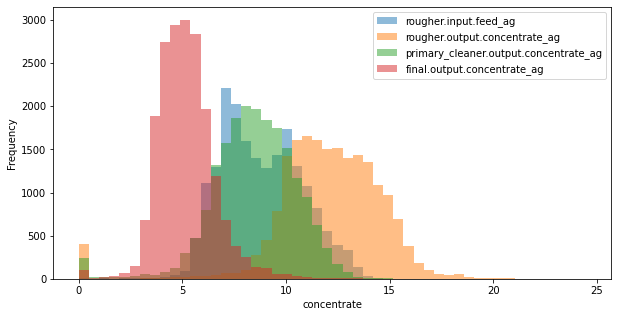


Золото на разных этапах очистки:


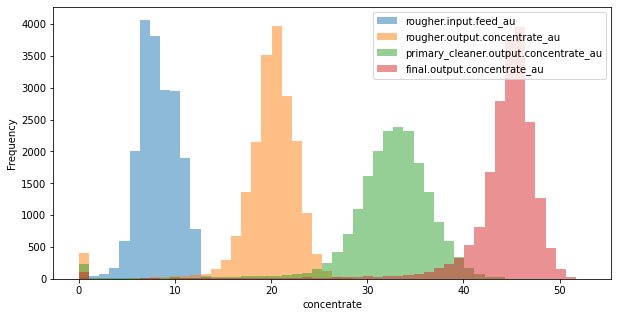


Свинец на разных этапах очистки:


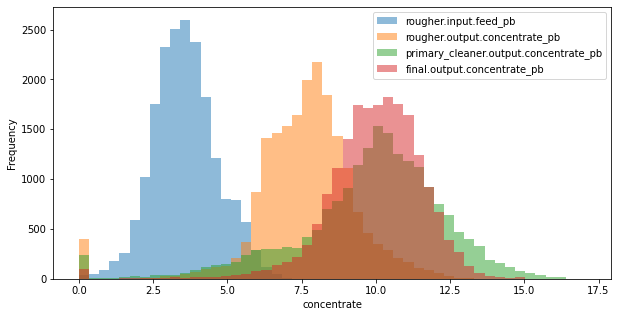

In [405]:
# предворительно заполним пропуски в полной таблице
df_full = df_full.interpolate()
metals = {'Серебро':'ag', 'Золото':'au', 'Свинец':'pb'}

# построим гистограммы
print('Гистограммы изменения концентрации металлов на разных этапах очистки:')

for name, met in metals.items():
    print(f'{name} на разных этапах очистки:')
    df_full[['rougher.input.feed_' + str(met), 'rougher.output.concentrate_' + str(met), 'primary_cleaner.output.concentrate_' + str(met), 'final.output.concentrate_' + str(met)]].plot(bins=50, alpha=0.5, kind='hist', figsize=(10,5));
    plt.xlabel('concentrate')
    plt.show()
    print()

По графикам отчетливо видно:
* Концентрация серебра после флотации увеличивается, а по мере очистки уменьшается.
* Концентрация золота значительно увеличивается на каждом этапе очистки.
* Концентрация свинца увеличивается после флотации и первой очистки, затем практически не меняется.
* Есть объекты, где концентрация тех или иных элементов нулевая.

### Сравение распределения размеров гранул сырья на обучающей и тестовой выборках

Для оценки распределения размеров гранул используем следующие признаки:

До флотации - `rougher.input.feed_size`.

После флотации (до первичной очистки) - `primary_cleaner.input.feed_size`.

Сравним распределения на обучающей и тестовой выборках.

Распределения размеров гранул сырья до флотации:


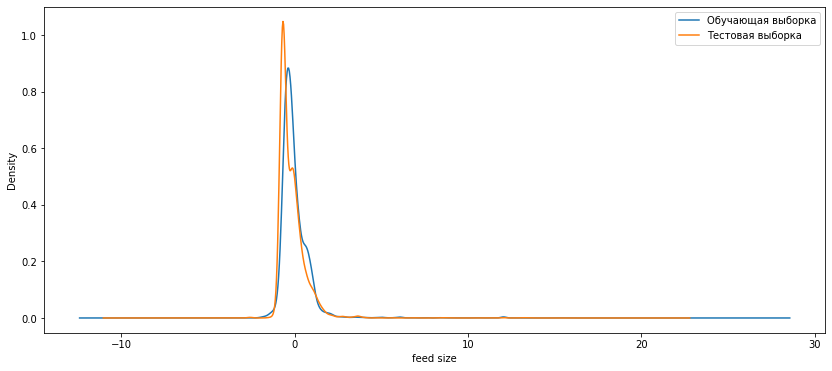

Распределения размеров гранул сырья после флотации:


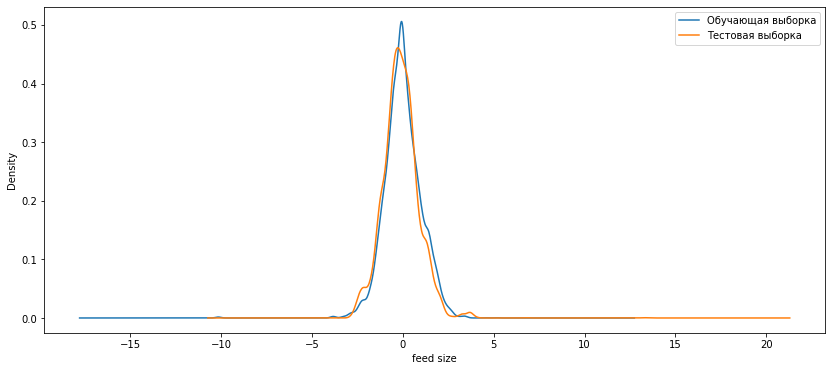

In [406]:
stadys = {'до флотации': 'rougher', 'после флотации': 'primary_cleaner'}

for name, stady in stadys.items():
    print(f'Распределения размеров гранул сырья {name}:')
    df_train_features[str(stady) + '.input.feed_size'].plot.kde(figsize=(14,6))
    df_test_features[str(stady) + '.input.feed_size'].plot.kde(figsize=(14,6))
    plt.legend(['Обучающая выборка', 'Тестовая выборка'])
    plt.xlabel('feed size');
    plt.show()
    print

Несколько подозрительно выглядит отрицательный размер гранул, однако, судя по частоте встречаемости, это может быть некое относительное значение.

По данным мы видим, что до флотации в тестовой выборке чаще встречаются гранулы чуть меньшего размера, чем в тренировочной. После флотации, практически нет тличий в размере гранул.

Тем не менее для уверенности проведем оценку среднего 2 выборок. Перед нами явно нормальное распределение. За нулевую гипотезу примем равнство средних, за альтернаривную - неравенство.

In [407]:
#выполним проверку на равенство средних, установим уровень статистической значимости 0.05
alpha = 0.05

for name, stady in stadys.items():
    print(f'По выборкам на стадии {name}:')
    result = st.ttest_ind(df_train_features[str(stady) + '.input.feed_size'], df_test_features[str(stady) + '.input.feed_size'])
    print('p-value:', result.pvalue)
    if result.pvalue < alpha:
        print("На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средние размеры гранул вероятно разные.")
    else:
        print("На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу. Средние размеры гранул вероятно равны.")
    print()

По выборкам на стадии до флотации:
p-value: 5.199372653222264e-29
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средние размеры гранул вероятно разные.

По выборкам на стадии после флотации:
p-value: 2.946568179577817e-12
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средние размеры гранул вероятно разные.



Несмотря на практически альтернативное распределение. Средние выборок оказались не равны. Вероятно, это следствие выбросов (крайних значений менее -10 и  более 10), их распределение неравномерно и влияет на среднее.

На обучение и тестированием модели это не должно оказать сильного влияния.

### Исследование суммарной концентрации всех веществ на разных стадиях

Оценку будем производить на общей выборке по следующим признакам:

1. До флотации. `rougher.input.feed_total`, как сумма:
* rougher.input.feed_ag
* rougher.input.feed_au
* rougher.input.feed_pb

2. После флотации. `rougher.output.concentrate_total`, как сумма:
* rougher.output.concentrate_ag
* rougher.output.concentrate_pb
* rougher.output.concentrate_au 

3. После первичной очистки. `primary_cleaner.output.concentrate_total`, как сумма:
* primary_cleaner.output.concentrate_ag
* primary_cleaner.output.concentrate_pb
* primary_cleaner.output.concentrate_au

4. После вторичной очистки (финальный продукт). `final.output.concentrate_total`, как сумма:
* final.output.concentrate_ag
* final.output.concentrate_pb
* final.output.concentrate_au

In [408]:
# создадим новые столбцы с сумарным содержанием для каждого процесса
df_full['rougher.input.feed_total'] = df_full[['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb']].sum(axis=1)
df_full['rougher.output.concentrate_total'] = df_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au']].sum(axis=1)
df_full['primary_cleaner.output.concentrate_total'] = df_full[['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb']].sum(axis=1)
df_full['final.output.concentrate_total'] = df_full[['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb']].sum(axis=1)

In [409]:
# создадим словарь для имен процессов
processes = {
    'до флотации':'rougher.input.feed_total', 'после флотации': 'rougher.output.concentrate_total', 
    'после первичной очистки':'primary_cleaner.output.concentrate_total', 'после вторичной очистки':'final.output.concentrate_total'}

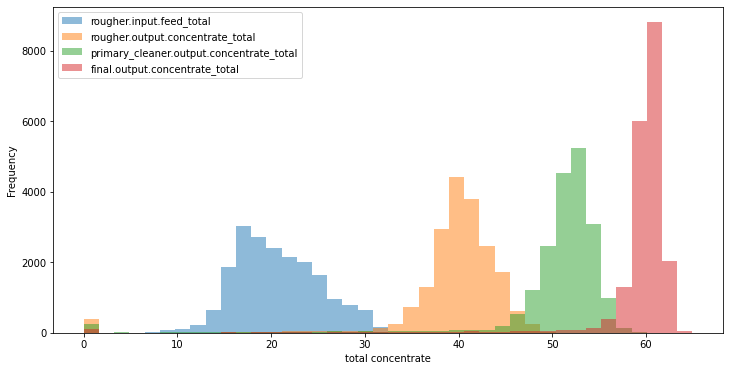

In [410]:
# Построим графики
df_full[processes.values()].plot(bins=40, kind='hist', figsize=(12,6), alpha=0.5)
plt.xlabel('total concentrate');

Мы видим, что общая концентрация поэтапно увиличивается. Однако присутствуют элементы, у которых концентрация всех металлов на том или ином этапе равна нулю.

Рассмотрим их сначала на графиках.

Распределение суммарной концентрации металлов до флотации:


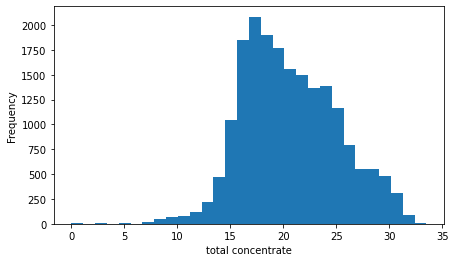


Распределение суммарной концентрации металлов после флотации:


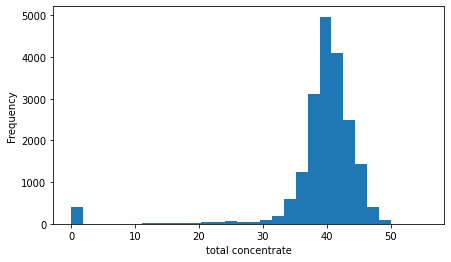


Распределение суммарной концентрации металлов после первичной очистки:


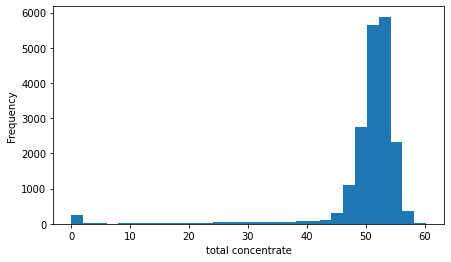


Распределение суммарной концентрации металлов после вторичной очистки:


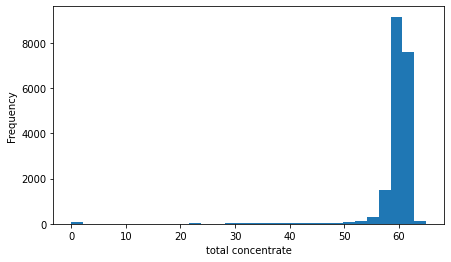

In [411]:
# Построим графики
for name, process in processes.items():
    print(f'Распределение суммарной концентрации металлов {name}:')
    df_full[process].plot(bins=30, kind='hist', figsize=(7, 4))
    plt.xlabel('total concentrate');
    plt.show()
    print()

In [412]:
# выделим строки с аномалиями
for process in processes.values():
    display(df_full[df_full[process] < 1])

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2018-03-12 02:59:59                     5.413548                     9.389648   
2018-03-12 03:59:59                     5.413548                     9.389648   
2018-03-12 04:59:59                     5.413548                     9.389648   
2018-03-12 05:59:59                     5.413548                     9.389648   
2018-03-12 06:59:59                     4.238007                     7.349108   

                     final.output.concentrate_sol  \
date                                                
2018-03-12 02:59:59                      8.731319   
2018-03-12 03:59:59                      8.731319   
2018-03-12 04:59:59                      8.731319   
2018-03-12 05:59:59                      8.731319   
2018-03-12 06:59:59                      6.833999   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2018-03-12 02:59:59                    45.270618                  100.0   
2018-03-12 03:59:59                    45.270618                  100.0   
2018-03-12 04:59:59                    45.270618                  100.0   
2018-03-12 05:59:59                    45.270618                  100.0   
2018-03-12 06:59:59                    35.424183                  100.0   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2018-03-12 02:59:59                   0.0                   0.0   
2018-03-12 03:59:59                   0.0                   0.0   
2018-03-12 04:59:59                   0.0                   0.0   
2018-03-12 05:59:59                   0.0                   0.0   
2018-03-12 06:59:59                   0.0                   0.0   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2018-03-12 02:59:59                    0.0                   0.0   
2018-03-12 03:59:59                    0.0                   0.0   
2018-03-12 04:59:59                    0.0                   0.0   
2018-03-12 05:59:59                    0.0                   0.0   
2018-03-12 06:59:59                    0.0                   0.0   

                     primary_cleaner.input.sulfate  \
date                                                 
2018-03-12 02:59:59                     173.823067   
2018-03-12 03:59:59                     173.810317   
2018-03-12 04:59:59                     173.854586   
2018-03-12 05:59:59                     173.840200   
2018-03-12 06:59:59                     173.838628   

                     primary_cleaner.input.depressant  \
date                                                    
2018-03-12 02:59:59                          7.965209   
2018-03-12 03:59:59                          7.989731   
2018-03-12 04:59:59                          8.010405   
2018-03-12 05:59:59                          8.007879   
2018-03-12 06:59:59                          8.013136   

                     primary_cleaner.input.feed_size  \
date                                                   
2018-03-12 02:59:59                         7.250000   
2018-03-12 03:59:59                         7.250000   
2018-03-12 04:59:59                         7.336667   
2018-03-12 05:59:59                         7.380000   
2018-03-12 06:59:59                         7.380000   

                     primary_cleaner.input.xanthate  \
date                                                  
2018-03-12 02:59:59                        1.095700   
2018-03-12 03:59:59                        1.109543   
2018-03-12 04:59:59                        1.097412   
2018-03-12 05:59:59                        1.132049   
2018-03-12 06:59:59                        1.100291   

                     primary_cleaner.output.concen

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-16 21:00:00                     4.566664                    10.406178   
2016-01-16 22:00:00                     4.577832                    10.691605   
2016-01-16 23:00:00                     4.591462                    10.628846   
2016-01-17 00:00:00                     5.296830                    10.597469   
2016-01-17 02:00:00                     8.162896                     8.877528   
2016-01-17 03:00:00                     5.759800                     9.537415   
2016-01-17 04:00:00                     5.807253                    10.439505   
2016-02-18 20:00:00                     8.478624                    11.303437   
2016-03-13 12:00:00                     0.371783                     0.629302   
2016-04-09 17:00:00                     0.000000                     0.000000   
2016-04-10 09:00:00                     6.215511                    12.427287   
2016-04-10 10:00:00                     5.720409                    11.832302   
2016-04-10 11:00:00                     5.328976                    11.304516   
2016-04-23 15:59:59                     8.323495                    10.596419   
2016-05-04 14:59:59                     7.350942                    10.820709   
2016-05-04 15:59:59                     7.159796                    10.518202   
2016-05-04 16:59:59                     6.416469                    10.191683   
2016-05-04 17:59:59                     6.075132                    10.814028   
2016-06-06 18:59:59                     4.437167                    10.843064   
2016-08-01 09:59:59                     4.045359                    11.983903   
2016-08-01 10:59:59                     3.697121                    11.726678   
2016-08-01 11:59:59                     3.586540                    12.261607   
2016-08-01 12:59:59                     3.842972                    12.597049   
2016-08-01 13:59:59                     4.251957                    12.363266   
2016-08-01 14:59:59                     4.403698                    10.823148   
2016-08-01 15:59:59                     5.114479                     9.707094   
2016-09-02 06:59:59                     0.000000                     0.000000   
2016-09-04 17:59:59                     3.508868                     9.828640   
2016-09-04 18:59:59                     3.567873                     9.826142   
2016-09-04 19:59:59                     3.599473                     9.932945   
2016-09-04 20:59:59                     3.505033                     9.899997   
2016-09-04 21:59:59                     3.412288                     9.635412   
2016-09-04 22:59:59                     3.336157                     9.828276   
2016-09-04 23:59:59                     3.428486                    10.066768   
2016-09-05 01:59:59                     3.683800                     9.827653   
2016-09-05 02:59:59                     3.521916                     9.667826   
2016-09-05 03:59:59                     3.564722                     9.924527   
2016-09-05 04:59:59                     3.380196                     9.841715   
2016-09-05 05:59:59                     3.269141                     9.869891   
2016-09-05 06:59:59                     3.214857                    10.086071   
2016-09-05 07:59:59                     3.243084                    10.148991   
2016-09-05 08:59:59                     3.177588                    10.108920   
2016-09-05 09:59:59                     3.339855                    10.444992   
2016-09-05 10:59:59                     3.419391                    10.427043   
2016-09-05 11:59:59                     3.882269                     9.681057   
2016-09-05 12:59:59                     4.877968                     9.409947   
2016-09-05 13:59:59                     4.888557                     9.244892   
2016-09-05 14:59:59                     4.817185    

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 19:00:00                     5.658943                    10.436002   
2016-01-15 22:00:00                     6.118749                    10.483007   
2016-01-16 06:00:00                     5.322681                     9.577672   
2016-01-18 01:00:00                     4.677499                    11.304745   
2016-01-18 04:00:00                     4.821388                    10.235502   
2016-01-18 19:00:00                     4.318247                    11.975455   
2016-01-18 20:00:00                     4.463523                    11.846933   
2016-01-20 17:00:00                     6.583268                     9.204989   
2016-02-18 08:00:00                     6.079666                    10.554819   
2016-02-18 09:00:00                     6.218298                    10.799375   
2016-03-20 17:00:00                     3.939067                    10.557684   
2016-04-09 17:00:00                     0.000000                     0.000000   
2016-04-10 13:00:00                     7.686177                    10.229270   
2016-04-10 23:00:00                     9.917852                     9.994286   
2016-04-16 08:00:00                     5.754686                     8.374495   
2016-07-06 13:59:59                     4.061049                     8.197506   
2016-08-23 15:59:59                     4.876925                     9.820362   
2016-09-02 06:59:59                     0.000000                     0.000000   
2016-11-28 18:59:59                     2.411910                     4.005096   
2016-12-21 15:59:59                     4.766111                     8.632653   
2017-01-06 19:59:59                     3.554558                    12.202148   
2017-01-06 20:59:59                     3.554558                    12.202148   
2017-01-06 21:59:59                     3.554558                    12.202148   
2017-01-06 22:59:59                     3.554558                    12.202148   
2017-01-06 23:59:59                     3.554558                    12.202148   
2017-01-19 00:59:59                     1.327277                     1.670745   
2017-02-17 16:59:59                     5.459512                    11.493138   
2017-02-17 17:59:59                     6.471208                    10.981242   
2017-02-17 18:59:59                     6.818790                    11.304961   
2017-02-17 19:59:59                     6.028197                    11.810934   
2017-02-21 11:59:59                     5.565929                    11.044217   
2017-02-24 01:59:59                     3.021076                     4.503815   
2017-04-03 19:59:59                     4.156756                     9.584440   
2017-04-09 10:59:59                     4.647301                    11.340013   
2017-04-09 11:59:59                     5.413399                    11.166561   
2017-04-09 12:59:59                     4.809907                    10.806946   
2017-04-09 13:59:59                     4.737483                    10.409908   
2017-04-09 14:59:59                     6.995476                    10.227566   
2017-04-09 15:59:59                     7.648236                    10.774782   
2017-04-11 18:59:59                     5.111142                    11.025253   
2017-04-11 19:59:59                     4.936572                    10.979321   
2017-04-12 01:59:59                     5.618554                    11.383301   
2017-04-12 02:59:59                     4.625220                    10.582883   
2017-04-15 07:59:59                     5.156932                    12.093019   
2017-04-15 08:59:59                     5.231190                    11.716720   
2017-04-23 20:59:59                     3.046829                     8.810359   
2017-04-23 21:59:59                     4.183238                    11.028972   
2017-06-08 12:59:59                     4.141167    

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-02-13 11:00:00                         0.00                         0.00   
2016-03-11 10:00:00                         0.00                         0.00   
2016-03-11 11:00:00                         0.00                         0.00   
2016-03-11 12:00:00                         0.00                         0.00   
2016-03-11 13:00:00                         0.00                         0.00   
2016-04-09 17:00:00                         0.00                         0.00   
2016-05-01 23:59:59                         0.00                         0.00   
2016-05-02 00:59:59                         0.00                         0.00   
2016-05-11 01:59:59                         0.00                         0.00   
2016-07-06 04:59:59                         0.00                         0.00   
2016-07-06 05:59:59                         0.00                         0.00   
2016-07-06 06:59:59                         0.00                         0.00   
2016-07-06 08:59:59                         0.00                         0.00   
2016-07-06 12:59:59                         0.00                         0.00   
2016-08-11 20:59:59                         0.00                         0.00   
2016-08-15 23:59:59                         0.00                         0.00   
2016-08-26 20:59:59                         0.00                         0.00   
2016-08-30 18:59:59                         0.00                         0.00   
2016-08-30 19:59:59                         0.00                         0.00   
2016-09-02 06:59:59                         0.00                         0.00   
2016-09-14 17:59:59                         0.00                         0.00   
2016-09-29 13:59:59                         0.00                         0.00   
2016-09-29 14:59:59                         0.00                         0.00   
2016-11-01 18:59:59                         0.00                         0.00   
2016-11-19 15:59:59                         0.00                         0.00   
2016-11-26 19:59:59                         0.00                         0.00   
2017-01-02 16:59:59                         0.00                         0.00   
2017-01-02 17:59:59                         0.00                         0.00   
2017-01-02 18:59:59                         0.00                         0.00   
2017-01-18 13:59:59                         0.00                         0.00   
2017-01-18 14:59:59                         0.00                         0.00   
2017-01-18 15:59:59                         0.00                         0.00   
2017-01-18 16:59:59                         0.00                         0.00   
2017-01-18 20:59:59                         0.00                         0.00   
2017-01-26 09:59:59                         0.00                         0.00   
2017-01-26 10:59:59                         0.00                         0.00   
2017-02-24 03:59:59                         0.00                         0.00   
2017-02-28 14:59:59                         0.00                         0.00   
2017-02-28 15:59:59                         0.00                         0.00   
2017-03-06 17:59:59                         0.00                         0.00   
2017-03-06 18:59:59                         0.00                         0.00   
2017-03-06 19:59:59                         0.00                         0.00   
2017-03-06 20:59:59                         0.00                         0.00   
2017-03-17 10:59:59                         0.00                         0.00   
2017-03-28 02:59:59                         0.00                         0.00   
2017-04-23 15:59:59                         0.00                         0.00   
2017-04-23 16:59:59                         0.00                         0.00   
2017-04-23 17:59:59                         0.00    

Несколько странно выглядит, когда до и после флотации в материале почти 0 металлов, а после очистки 53.

Но ещё более странно, когда общее содержание становится равным 0, на определенных этапах, а затем сново обретает весомые значения.

Строки с аномальными и выбивающимися значениями лучше удалить. Поскольку, они обнаружены на общей выборке, нам необходимо сохранить индексы полученных строк, чтобы затем удалить их из тестовой и валидационной выборок.

In [413]:
# создадим список индексов аномальных объектов
indexes_anomal = []

for process in processes.values():
    indexes_anomal += list(df_full[df_full[process] < 1].index)
indexes_anomal = pd.Series(indexes_anomal)
indexes_anomal = indexes_anomal.unique()

Удалим аномальные объекты из тестовой и валидационной выборок.

In [414]:
# создадим списки индексов для удаления
indexes_anomal_train = [x for x in indexes_anomal if x in df_train.index]
indexes_anomal_test = [x for x in indexes_anomal if x in df_test.index]

# удалим аномальные объекты из выборок
df_train = df_train.drop(index=indexes_anomal_train)
df_test = df_test.drop(index=indexes_anomal_test)

### Вывод

Мы проанализировали изменение концентрации металлов на разных этапах процесса, сравнили распределения размеров гранул сырья в тестовой и валидационной выборках, исследовали данные по сумарному концентрату, очистили выборки от аномалий.

Можем приступать к обучению моделей.

## Обучение и тестирование модели

### Подготовка выборок

Выделим целевые признаки в отдельные таблицы.

In [415]:
df_train_target_rougher = df_train['rougher.output.recovery']
df_train_target_final = df_train['final.output.recovery']
df_train_features = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

df_test_target_rougher = df_test['rougher.output.recovery']
df_test_target_final = df_test['final.output.recovery']
df_test_features = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

В таблице присутствуют признаки с разными разбросами значений. Приведем их к общему масштабу и запишем в отдельные переменные.

In [416]:
# обозначим признаки для масштабирования
scale_features = df_train_features.columns

# обучим объект для масштабирования
scaler = StandardScaler()
scaler.fit(df_train_features[scale_features])

# создадим отдельные переменные для отмасштабированных данных
df_train_features_sc = df_train_features
df_test_features_sc = df_test_features

# масштабируем
pd.options.mode.chained_assignment = None
df_train_features_sc[scale_features] = scaler.transform(df_train_features_sc[scale_features])
df_test_features_sc[scale_features] = scaler.transform(df_test_features_sc[scale_features])

# проверим результат
df_train_features_sc.head()

primary_cleaner.input.sulfate  \
date                                                 
2016-01-15 00:00:00                      -0.176960   
2016-01-15 01:00:00                      -0.214704   
2016-01-15 02:00:00                      -0.261394   
2016-01-15 03:00:00                      -0.301379   
2016-01-15 04:00:00                      -0.411870   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-15 00:00:00                          0.375238   
2016-01-15 01:00:00                          0.425349   
2016-01-15 02:00:00                          0.729684   
2016-01-15 03:00:00                          0.731432   
2016-01-15 04:00:00                          0.907904   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-15 00:00:00                        -0.128322   
2016-01-15 01:00:00                        -0.128322   
2016-01-15 02:00:00                        -0.128322   
2016-01-15 03:00:00                        -0.128322   
2016-01-15 04:00:00                        -0.128322   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-15 00:00:00                        0.283282   
2016-01-15 01:00:00                        0.320284   
2016-01-15 02:00:00                        0.289952   
2016-01-15 03:00:00                        0.304518   
2016-01-15 04:00:00                        0.339461   

                     primary_cleaner.state.floatbank8_a_air  \
date                                                          
2016-01-15 00:00:00                               -0.446631   
2016-01-15 01:00:00                               -0.241374   
2016-01-15 02:00:00                               -0.043906   
2016-01-15 03:00:00                               -0.056252   
2016-01-15 04:00:00                               -0.045589   

                     primary_cleaner.state.floatbank8_a_level  \
date                                                            
2016-01-15 00:00:00                                 -0.299216   
2016-01-15 01:00:00                                 -0.355832   
2016-01-15 02:00:00                                 -0.330059   
2016-01-15 03:00:00                                 -0.357162   
2016-01-15 04:00:00                                 -0.301015   

                     primary_cleaner.state.floatbank8_b_air  \
date                                                          
2016-01-15 00:00:00                               -0.428700   
2016-01-15 01:00:00                               -0.241940   
2016-01-15 02:00:00                               -0.055792   
2016-01-15 03:00:00                               -0.053716   
2016-01-15 04:00:00                               -0.047784   

                     primary_cleaner.state.floatbank8_b_level  \
date                                                            
2016-01-15 00:00:00                                 -0.810461   
2016-01-15 01:00:00                                 -0.321603   
2016-01-15 02:00:00                                 -0.343533   
2016-01-15 03:00:00                                 -0.316022   
2016-01-15 04:00:00                                 -0.335123   

                     primary_cleaner.state.floatbank8_c_air  \
date                                                          
2016-01-15 00:00:00                               -0.433392   
2016-01-15 01:00:00                               -0.238986   
2016-01-15 02:00:00                               -0.045405   
2016-01-15 03:00:00                               -0.058053   
2016-01-15 04:00:00                               -0.063429   

                     primary_cleaner.state.floatbank8_c_level  \
date                                                            
2016-01-15 00:00:00                                 -0.276264   
2016-01-15 01:00:00           

Данные успешно отмасштабированы.

### Обучение и выбор модели

Напишим функции для вычисления sMAPE и итоговой sMAPE.

In [417]:
# функция для sMAPE
def smape(target, predicted):
    numerator = abs(target - predicted)
    denumerator = (abs(target) + abs(predicted)) / 2
    smape = 100 * (numerator / denumerator).sum() / len(numerator)
    return smape   

# функция для итоговой sMAPE
def smape_final(smape_roug, smape_fin):
    smape_final = 0.25 * smape_roug + 0.75 * smape_fin
    return smape_final 

Обучим несколько моделей с разными параметрами и выберим лучшую.
* Дерево решений
* Случайный лес
* Линейная регрессия
* Бэггинг

Начнем с дерева решений.

In [421]:
%%time

# напишем функцию для подбора параметров модели
def model_tree_selection(features, target):
    model_tree = None
    model_tree_score = 100
    model_tree_max_depth = 0

    for depth in range(1, 12):
        model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
        scores = cross_val_score(model, features, target, cv=4, scoring=make_scorer(smape, greater_is_better=False), n_jobs=-1)
        score = pd.Series(abs(scores)).mean()
        if score < model_tree_score:
            model_tree_score = score
            model_tree_max_depth = depth
            model_tree = model  

    print("Score наилучшей модели дерева решений при валидации:", model_tree_score)
    print("Глубина дерева решений:", model_tree_max_depth)
    
    return model_tree, model_tree_score, model_tree_max_depth

# получим параметры моделей для предсказания эффективности 2 процессов
print('Дерево решений')
print()
print('Предсказания по черновому концентрату')
model_tree_rougher, model_tree_score_rougher, model_tree_max_depth_rougher = model_tree_selection(df_train_features_sc, df_train_target_rougher)
print()
print('Предсказания по конечному концентрату')
model_tree_final, model_tree_score_final, model_tree_max_depth_final = model_tree_selection(df_train_features_sc, df_train_target_final)

Дерево решений

Предсказания по черновому концентрату
Score наилучшей модели дерева решений при валидации: 7.7891984867687984
Глубина дерева решений: 4

Предсказания по конечному концентрату
Score наилучшей модели дерева решений при валидации: 9.680517536310365
Глубина дерева решений: 2
CPU times: total: 1.27 s
Wall time: 12.3 s


Обучим случайный лес.

In [432]:
%%time
# 1,5 минуты. Налейте себе кофейку :)

parametrs = {'n_estimators': range(5, 31, 5),
            'max_depth': range(2, 10, 2)}

# создадим функцию для подбора параметров Случайного леса

def model_forest_selection(features, target):
    rs_model = RandomForestRegressor(random_state=12345)
    rs = RandomizedSearchCV(rs_model, parametrs, scoring=make_scorer(smape, greater_is_better=False), n_jobs=-1, random_state=12345)
    rs.fit(features, target)
    
    model_forest = rs.best_estimator_
    model_forest_score = abs(rs.best_score_)
    model_forest_max_depth = rs.best_params_['max_depth']
    model_forest_estimators = rs.best_params_['n_estimators']
    
    print("Score наилучшей модели случайного леса на валидационной выборке:", model_forest_score)
    print("Число деревьев решений:", model_forest_estimators)
    print("Максимальная глубина деревьев решений:", model_forest_max_depth)
    
    return model_forest, model_forest_score, model_forest_estimators, model_forest_max_depth    

# получим параметры моделей для предсказания эффективности 2 процессов
print('Случайный лес')
print()
print('Предсказания по черновому концентрату')
model_forest_rougher, model_forest_score_rougher, model_forest_estimators_rougher, model_forest_max_depth_rougher = model_forest_selection(df_train_features_sc, df_train_target_rougher)
print()
print('Предсказания по конечному концентрату')
model_forest_final, model_forest_score_final, model_forest_estimators_rougher, model_forest_max_depth_final = model_forest_selection(df_train_features_sc, df_train_target_final)

Случайный лес

Предсказания по черновому концентрату
Score наилучшей модели случайного леса на валидационной выборке: 6.502949377186606
Число деревьев решений: 30
Максимальная глубина деревьев решений: 6

Предсказания по конечному концентрату
Score наилучшей модели случайного леса на валидационной выборке: 9.033561202359845
Число деревьев решений: 25
Максимальная глубина деревьев решений: 4
CPU times: total: 12.9 s
Wall time: 1min 11s


Обучим модель линейной регрессии.

In [429]:
# напишем функцию для модели
def model_regression_selection(features, target):
    model = LinearRegression()
    model.fit(features, target)
    scores = cross_val_score(model, features, target, cv=4, scoring=make_scorer(smape, greater_is_better=False), n_jobs=-1)
    score = pd.Series(abs(scores)).mean()
    print("Score модели линейной регрессии на валидационной выборке:", score)
    
    return model, score

print('Линейная регрессия')
print()
print('Предсказания по черновому концентрату')
model_regression_rougher, model_regression_score_rougher = model_regression_selection(df_train_features_sc, df_train_target_rougher)
print()
print('Предсказания по конечному концентрату')
model_regression_final, model_regression_score_final = model_regression_selection(df_train_features_sc, df_train_target_final)

Линейная регрессия

Предсказания по черновому концентрату
Score модели линейной регрессии на валидационной выборке: 7.826933730036702

Предсказания по конечному концентрату
Score модели линейной регрессии на валидационной выборке: 10.755679350227583


Обучим ансабль моделей линейной регрессии.

In [430]:
%%time
# займет 1 минуту

def bagging(features, target):
    model_bagging = None
    model_bagging_score = 100
    
    for est in range(2, 61, 2):
        model = BaggingRegressor(random_state=12345, base_estimator=LinearRegression(), n_estimators=est, max_features=0.5, max_samples=0.5, bootstrap=True)
        scores = cross_val_score(model, features, target, scoring=make_scorer(smape, greater_is_better=False), n_jobs=-1, cv=4)
        score = pd.Series(abs(scores)).mean()
        if score < model_bagging_score:
            model_bagging_score = score
            model_bagging = model
    print("Score ансамбля моделей линейной регрессии на валидационной выборке:", score)
    return model_bagging, model_bagging_score

print('Ансамбль линейной регрессии')
print()
print('Предсказания по черновому концентрату')
model_bagging_rougher, model_bagging_score_rougher = bagging(df_train_features_sc, df_train_target_rougher)
print()
print('Предсказания по конечному концентрату')
model_bagging_final, model_bagging_score_final = bagging(df_train_features_sc, df_train_target_final)

Ансамбль линейной регрессии

Предсказания по черновому концентрату
Score ансамбля моделей линейной регрессии на валидационной выборке: 7.092625614688245

Предсказания по конечному концентрату
Score ансамбля моделей линейной регрессии на валидационной выборке: 9.55057340397693
CPU times: total: 3.22 s
Wall time: 54.9 s


После проверок моделей установлено, что лучше всего эфективность переработки чернового концентрата предсказывает модель 
Случайный лес (число деревьев решений: 30, максимальная глубина деревьев решений: 6).

Для конечного концентрата - Случайный лес (число деревьев решений: 25, максимальная глубина деревьев решений: 4).

Оченим конечное sMAPE.

In [433]:
smape_total = smape_final(model_forest_score_rougher, model_forest_score_final)
print('Итоговое sMAPE на валидационных данных:', smape_total)

Итоговое sMAPE на валидационных данных: 8.400908246066535


Проверим эти модели на тестовой выборке.

### Проверка модели

Проведем оценку моделей на тестовых данных.

In [434]:
# передсказания по черновому концентрату
predicted_rougher = model_forest_rougher.predict(df_test_features_sc)
test_smape_rougher = smape(df_test_target_rougher, predicted_rougher)
print('sMape предсказаний модели на тестовой выборке по черновому концентрату:', test_smape_rougher)

# передсказания по кончному концентрату
predicted_final = model_forest_final.predict(df_test_features_sc)
test_smape_final = smape(df_test_target_final, predicted_final)
print('sMape предсказаний модели на тестовой выборке по конечному концентрату:', test_smape_final)

# итоговое sMAPE
finish_smape = smape_final(test_smape_rougher, test_smape_final)
print()
print('Итоговое sMape предсказаний модели на тестовой выборке:', finish_smape)

sMape предсказаний модели на тестовой выборке по черновому концентрату: 4.253463858426696
sMape предсказаний модели на тестовой выборке по конечному концентрату: 8.237814544260054

Итоговое sMape предсказаний модели на тестовой выборке: 7.241726872801714


Проверим модель на адекватность.

In [435]:
# передсказания по черновому концентрату
dummy_model_rougher = DummyRegressor()
dummy_model_rougher.fit(df_train_features_sc, df_train_target_rougher)

dummy_predicted_rougher = dummy_model_rougher.predict(df_test_features_sc)
dummy_test_smape_rougher = smape(df_test_target_rougher, dummy_predicted_rougher)
print('sMape предсказаний фиктивной модели на тестовой выборке по черновому концентрату:', dummy_test_smape_rougher)

# передсказания по кончному концентрату
dummy_model_final = DummyRegressor()
dummy_model_final.fit(df_train_features_sc, df_train_target_final)

dummy_predicted_final = dummy_model_final.predict(df_test_features_sc)
dummy_test_smape_final = smape(df_test_target_final, dummy_predicted_final)
print('sMape предсказаний фиктивной модели на тестовой выборке по конечному концентрату:', dummy_test_smape_final)

# итоговое sMAPE
dummy_finish_smape = smape_final(dummy_test_smape_rougher, dummy_test_smape_final)
print()
print('Итоговое sMape предсказаний фиктивной модели на тестовой выборке:', dummy_finish_smape)

sMape предсказаний фиктивной модели на тестовой выборке по черновому концентрату: 5.360399873688382
sMape предсказаний фиктивной модели на тестовой выборке по конечному концентрату: 8.586124677403113

Итоговое sMape предсказаний фиктивной модели на тестовой выборке: 7.7796934764744305


Предсказания нашей модели лучше, чем у фиктивной. Хотя и не слишком значительно.

## Вывод

Мы обработали и очистили полученные данные, устранили аномалии, провели анализ, в ходе которого было установлено:
* Концентрация серебра после флотации увеличивается, а по мере очистки уменьшается.
* Концентрация золота значительно увеличивается на каждом этапе очистки.
* Концентрация свинца увеличивается после флотации и первой очистки, затем практически не меняется.
* Размеры гранул по выборкам распределены равномерно.
* Могут существовать объекты, где концентрация тех или иных элементов нулевая, но общая концентрация всех металлов, особенно на конечных стадиях нулевыми быть не должны.

Затем мы обучили 4 типа моделей и подобрали лучшие параметры для предсказаний по черновому и финальному концентратам в отдельности. По итогу лучшей в обоих случаях стала содель Случайный лес, но с разными параметрами:
1. Черновой концентрат - число деревьев решений: 30, максимальная глубина деревьев решений: 6.
2. Конечный концентрат - исло деревьев решений: 25, максимальная глубина деревьев решений: 4.

Нам удалось добиться итогового sMAPE 7.24.